# TUGAS DATA MINING

In [82]:
#import sys
#!conda install --yes --prefix {sys.prefix} plotly

In [83]:
#pip install apyori

# Import Library

In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px
import apyori
from apyori import apriori

# Import Dataset

In [85]:
data = pd.read_csv('labor.csv')

In [86]:
data.head()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1,5,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below_average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5,?,40,?,?,?,?,12,average,?,half,yes,half,good


In [87]:
data.shape

(57, 17)

In [88]:
data.dtypes

duration                          object
wage-increase-first-year          object
wage-increase-second-year         object
wage-increase-third-year          object
cost-of-living-adjustment         object
working-hours                     object
pension                           object
standby-pay                       object
shift-differential                object
education-allowance               object
statutory-holidays                object
vacation                          object
longterm-disability-assistance    object
contribution-to-dental-plan       object
bereavement-assistance            object
contribution-to-health-plan       object
class                             object
dtype: object

Ganti value "?" dengan NaN atau Null

In [89]:
data.replace('?', np.nan, inplace= True)
data

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1,5,NaN,NaN,NaN,40,NaN,NaN,2,NaN,11,average,NaN,NaN,yes,NaN,good
1,2,4.5,5.8,NaN,NaN,35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full,good
2,NaN,NaN,NaN,NaN,NaN,38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN,good
4,3,4.5,4.5,5,NaN,40,NaN,NaN,NaN,NaN,12,average,NaN,half,yes,half,good
5,2,2,2.5,NaN,NaN,35,NaN,NaN,6,yes,12,average,NaN,NaN,NaN,NaN,good
6,3,4,5,5,tc,NaN,empl_contr,NaN,NaN,NaN,12,generous,yes,none,yes,half,good
7,3,6.9,4.8,2.3,NaN,40,NaN,NaN,3,NaN,12,below_average,NaN,NaN,NaN,NaN,good
8,2,3,7,NaN,NaN,38,NaN,12,25,yes,11,below_average,yes,half,yes,NaN,good
9,1,5.7,NaN,NaN,none,40,empl_contr,NaN,4,NaN,11,generous,yes,full,NaN,NaN,good


In [90]:
data.rename(columns = {'class':'kelas'}, inplace = True) 

In [91]:
data.rename(columns = {'wage-increase-first-year':'WIFirstYear'}, inplace = True) 

In [92]:
data.rename(columns = {'wage-increase-second-year':'WISecondYear'}, inplace = True) 

In [94]:
data.rename(columns = {'wage-increase-third-year':'WIThirdYear'}, inplace = True) 

In [95]:
data.drop('kelas', axis=1, inplace=True)

Lihat Jumlah Data yang Nan dalam Setiap Variabel

In [96]:
data.isnull().sum()

duration                           1
WIFirstYear                        1
WISecondYear                      11
WIThirdYear                       42
cost-of-living-adjustment         20
working-hours                      6
pension                           30
standby-pay                       48
shift-differential                26
education-allowance               35
statutory-holidays                 4
vacation                           6
longterm-disability-assistance    29
contribution-to-dental-plan       20
bereavement-assistance            27
contribution-to-health-plan       20
dtype: int64

Isi Value NaN untuk setiap Variabel dengan Top Values pada Setiap Variabel

In [97]:
data['duration']=data['duration'].replace(['1','2','3'], ['duration1','duration2','duration3'])

In [98]:
data['duration'].describe()

count            56
unique            3
top       duration2
freq             27
Name: duration, dtype: object

In [100]:
data['duration'] = data['duration'].fillna('duration2')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,5,NaN,NaN,NaN,40,NaN,NaN,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,4.5,5.8,NaN,NaN,35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,NaN,NaN,NaN,NaN,38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half
3,duration3,3.7,4,5,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,4.5,4.5,5,NaN,40,NaN,NaN,NaN,NaN,12,average,NaN,half,yes,half


In [101]:
data['WIFirstYear'].describe()

count     56
unique    17
top        2
freq      10
Name: WIFirstYear, dtype: object

In [102]:
data['WIFirstYear'] = data['WIFirstYear'].fillna('2')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,5,NaN,NaN,NaN,40,NaN,NaN,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,4.5,5.8,NaN,NaN,35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,2,NaN,NaN,NaN,38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half
3,duration3,3.7,4,5,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,4.5,4.5,5,NaN,40,NaN,NaN,NaN,NaN,12,average,NaN,half,yes,half


In [103]:
a = data['WIFirstYear'].unique()
a.sort()
a

array(['2', '2.1', '2.5', '2.8', '3', '3.5', '3.7', '4', '4.3', '4.5',
       '4.6', '5', '5.7', '6', '6.4', '6.9', '7'], dtype=object)

In [104]:
data['WIFirstYear']=data['WIFirstYear'].replace(['2', '2.1', '2.5', '2.8', '3', '3.5', '3.7', '4', '4.3', '4.5',
       '4.6', '5', '5.7', '6', '6.4', '6.9', '7'], ['wageFirst2', 'wageFirst2.1', 'wageFirst2.5', 'wageFirst2.8', 'wageFirst3', 'wageFirst3.5', 'wageFirst3.7', 'wageFirst4', 'wageFirst4.3', 'wageFirst4.5',
       'wageFirst4.6', 'wageFirst5', 'wageFirst5.7', 'wageFirst6', 'wageFirst6.4', 'wageFirst6.9', 'wageFirst7'])

In [105]:
data['WISecondYear'].describe()

count     46
unique    15
top        4
freq      13
Name: WISecondYear, dtype: object

In [106]:
data['WISecondYear'] = data['WISecondYear'].fillna('4')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,4,NaN,NaN,40,NaN,NaN,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,5.8,NaN,NaN,35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,4,NaN,NaN,38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,4,5,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,4.5,5,NaN,40,NaN,NaN,NaN,NaN,12,average,NaN,half,yes,half


In [107]:
a = data['WISecondYear'].unique()
a.sort()
a

array(['2', '2.5', '3', '3.5', '4', '4.4', '4.5', '4.6', '4.8', '5',
       '5.3', '5.8', '6', '6.4', '7'], dtype=object)

In [108]:
data['WISecondYear']=data['WISecondYear'].replace(['2', '2.5', '3', '3.5', '4', '4.4', '4.5', '4.6', '4.8', '5',
       '5.3', '5.8', '6', '6.4', '7'], ['wageSecond2', 'wageSecond2.5', 'wageSecond3', 'wageSecond3.5', 'wageSecond4', 'wageSecond4.4', 'wageSecond4.5', 'wageSecond4.6', 'wageSecond4.8', 'wageSecond5',
       'wageSecond5.3', 'wageSecond5.8', 'wageSecond6', 'wageSecond6.4', 'wageSecond7'])

In [109]:
data['WIThirdYear'].describe()

count     15
unique     9
top        5
freq       5
Name: WIThirdYear, dtype: object

In [110]:
data['WIThirdYear'] = data['WIThirdYear'].fillna('5')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,5,NaN,40,NaN,NaN,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,5,NaN,35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,5,NaN,38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,5,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,5,NaN,40,NaN,NaN,NaN,NaN,12,average,NaN,half,yes,half


In [111]:
a = data['WIThirdYear'].unique()
a.sort()
a

array(['2', '2.1', '2.3', '2.5', '4', '4.5', '4.6', '5', '5.1'],
      dtype=object)

In [112]:
data['WIThirdYear']=data['WIThirdYear'].replace(['2', '2.1', '2.3', '2.5', '4', '4.5', '4.6', '5', '5.1'], ['wageThrid2', 'wageThrid2.1', 'wageThrid2.3', 'wageThrid2.5', 'wageThrid4', 'wageThrid4.5', 'wageThrid4.6', 'wageThrid5', 'wageThrid5.1'])

In [113]:
data['cost-of-living-adjustment'].describe()

count       37
unique       3
top       none
freq        22
Name: cost-of-living-adjustment, dtype: object

In [114]:
data['cost-of-living-adjustment'] = data['cost-of-living-adjustment'].fillna('none')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,none,40,NaN,NaN,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,none,35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,none,38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,tc,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,none,40,NaN,NaN,NaN,NaN,12,average,NaN,half,yes,half


In [115]:
a = data['cost-of-living-adjustment'].unique()
a.sort()
a

array(['none', 'tc', 'tcf'], dtype=object)

In [116]:
data['cost-of-living-adjustment']=data['cost-of-living-adjustment'].replace(['none', 'tc', 'tcf'], ['colanone', 'colatc', 'colatcf'])

In [117]:
data['working-hours'].describe()

count     51
unique     8
top       40
freq      23
Name: working-hours, dtype: object

In [118]:
data['working-hours'] = data['working-hours'].fillna('40')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,40,NaN,NaN,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,40,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,40,NaN,NaN,NaN,NaN,12,average,NaN,half,yes,half


In [119]:
a = data['working-hours'].unique()
a.sort()
a

array(['27', '33', '35', '36', '37', '38', '39', '40'], dtype=object)

In [120]:
data['working-hours']=data['working-hours'].replace(['27', '33', '35', '36', '37', '38', '39', '40'], ['workinghours27', 'workinghours33', 'workinghours35', 'workinghours36', 'workinghours37', 'workinghours38', 'workinghours39', 'workinghours40'])

In [121]:
data['pension'].describe()

count             27
unique             3
top       empl_contr
freq              12
Name: pension, dtype: object

In [122]:
data['pension'] = data['pension'].fillna('empl_contr')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,NaN,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,NaN,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,NaN,5,NaN,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,NaN,NaN,NaN,12,average,NaN,half,yes,half


In [123]:
a = data['pension'].unique()
a.sort()
a

array(['empl_contr', 'none', 'ret_allw'], dtype=object)

In [124]:
data['pension']=data['pension'].replace(['none'], ['pensioun_none'])

In [125]:
data['standby-pay'].describe()

count     9
unique    7
top       2
freq      3
Name: standby-pay, dtype: object

In [126]:
data['standby-pay'] = data['standby-pay'].fillna('2')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,2,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,2,NaN,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,2,5,NaN,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,2,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,2,NaN,NaN,12,average,NaN,half,yes,half


In [127]:
a = data['standby-pay'].unique()
a.sort()
a

array(['10', '12', '13', '14', '2', '4', '8'], dtype=object)

In [128]:
data['standby-pay']=data['standby-pay'].replace(['10', '12', '13', '14', '2', '4', '8'], ['standByPay10', 'standByPay12', 'standByPay13', 'standByPay14', 'standByPay2', 'standByPay4', 'standByPay8'])

In [129]:
data['shift-differential'].describe()

count     31
unique    10
top        3
freq       7
Name: shift-differential, dtype: object

In [130]:
data['shift-differential'] = data['shift-differential'].fillna('3')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,2,NaN,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,3,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,5,NaN,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,3,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,3,NaN,12,average,NaN,half,yes,half


In [131]:
a = data['shift-differential'].unique()
a.sort()
a

array(['0', '1', '10', '14', '2', '25', '3', '4', '5', '6'], dtype=object)

In [132]:
data['shift-differential']=data['shift-differential'].replace(['0', '1', '10', '14', '2', '25', '3', '4', '5', '6'], ['Sd_0', 'Sd_1', 'Sd_10', 'Sd_14', 'Sd_2', 'Sd_25', 'Sd_3', 'Sd_4', 'Sd_5', 'Sd_6'])

In [133]:
data['education-allowance'].describe()

count     22
unique     2
top       no
freq      12
Name: education-allowance, dtype: object

In [134]:
data['education-allowance'] = data['education-allowance'].fillna('no')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,NaN,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,12,average,NaN,half,yes,half


In [135]:
a = data['education-allowance'].unique()
a.sort()
a

array(['no', 'yes'], dtype=object)

In [136]:
data['statutory-holidays'].describe()

count     53
unique     6
top       11
freq      21
Name: statutory-holidays, dtype: object

In [137]:
data['statutory-holidays'] = data['statutory-holidays'].fillna('11')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,11,NaN,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,12,average,NaN,half,yes,half


In [138]:
a = data['statutory-holidays'].unique()
a.sort()
a

array(['10', '11', '12', '13', '15', '9'], dtype=object)

In [139]:
data['statutory-holidays']=data['statutory-holidays'].replace(['10', '11', '12', '13', '15', '9'], ['sHoliday_10', 'sHoliday_11', 'sHoliday_12', 'sHoliday_13', 'sHoliday_15', 'sHoliday_9'])

In [140]:
data['vacation'].describe()

count                51
unique                3
top       below_average
freq                 18
Name: vacation, dtype: object

In [141]:
data['vacation'] = data['vacation'].fillna('below_average')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,sHoliday_11,average,NaN,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,sHoliday_11,below_average,NaN,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,sHoliday_11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,sHoliday_11,below_average,NaN,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,sHoliday_12,average,NaN,half,yes,half


In [142]:
a = data['vacation'].unique()
a.sort()
a

array(['average', 'below_average', 'generous'], dtype=object)

In [143]:
data['longterm-disability-assistance'].describe()

count      28
unique      2
top       yes
freq       20
Name: longterm-disability-assistance, dtype: object

In [144]:
data['longterm-disability-assistance'] = data['longterm-disability-assistance'].fillna('yes')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,sHoliday_11,average,yes,NaN,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,sHoliday_11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,NaN,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,sHoliday_12,average,yes,half,yes,half


In [145]:
a = data['longterm-disability-assistance'].unique()
a.sort()
a

array(['no', 'yes'], dtype=object)

In [146]:
data['contribution-to-dental-plan'].describe()

count       37
unique       3
top       half
freq        15
Name: contribution-to-dental-plan, dtype: object

In [147]:
data['contribution-to-dental-plan'] = data['contribution-to-dental-plan'].fillna('half')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,sHoliday_11,average,yes,half,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,full,NaN,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,sHoliday_11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,half,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,sHoliday_12,average,yes,half,yes,half


In [149]:
a = data['contribution-to-dental-plan'].unique()
a.sort()
a

array(['full', 'half', 'none'], dtype=object)

In [150]:
data['contribution-to-dental-plan']=data['contribution-to-dental-plan'].replace(['none'], ['dentalplan_none'])

In [151]:
data['bereavement-assistance'].describe()

count      30
unique      2
top       yes
freq       27
Name: bereavement-assistance, dtype: object

In [152]:
data['bereavement-assistance'] = data['bereavement-assistance'].fillna('yes')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,sHoliday_11,average,yes,half,yes,NaN
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,full,yes,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,sHoliday_11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,half,yes,NaN
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,sHoliday_12,average,yes,half,yes,half


In [153]:
a = data['bereavement-assistance'].unique()
a.sort()
a

array(['no', 'yes'], dtype=object)

In [154]:
data['contribution-to-health-plan'].describe()

count       37
unique       3
top       full
freq        20
Name: contribution-to-health-plan, dtype: object

In [156]:
data['contribution-to-health-plan'] = data['contribution-to-health-plan'].fillna('full')
data.head(5)

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,sHoliday_11,average,yes,half,yes,full
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,full,yes,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,sHoliday_11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,half,yes,full
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,sHoliday_12,average,yes,half,yes,half


In [157]:
a = data['contribution-to-health-plan'].unique()
a.sort()
a

array(['full', 'half', 'none'], dtype=object)

In [158]:
data['contribution-to-health-plan']=data['contribution-to-health-plan'].replace(['none'], ['healtsplan_none'])

In [159]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
contribution-to-health-plan,0,0.0
bereavement-assistance,0,0.0
contribution-to-dental-plan,0,0.0
longterm-disability-assistance,0,0.0
vacation,0,0.0


In [167]:
data.head()

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
0,duration1,wageFirst5,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_2,no,sHoliday_11,average,yes,half,yes,full
1,duration2,wageFirst4.5,wageSecond5.8,wageThrid5,colanone,workinghours35,ret_allw,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,full,yes,full
2,2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours38,empl_contr,standByPay2,Sd_5,no,sHoliday_11,generous,yes,half,yes,half
3,duration3,wageFirst3.7,wageSecond4,wageThrid5,colatc,workinghours40,empl_contr,standByPay2,Sd_3,yes,sHoliday_11,below_average,yes,half,yes,full
4,duration3,wageFirst4.5,wageSecond4.5,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,sHoliday_12,average,yes,half,yes,half


Lihat Deskripsi Keseluruhan Data 

In [162]:
# Deskripsi keseluruhan data
data.describe(include='all')

,duration,WIFirstYear,WISecondYear,WIThirdYear,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan
count,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
unique,4,17,15,9,3,8,3,7,10,2,6,3,2,3,2,3
top,duration2,wageFirst2,wageSecond4,wageThrid5,colanone,workinghours40,empl_contr,standByPay2,Sd_3,no,sHoliday_11,below_average,yes,half,yes,full
freq,27,11,24,47,42,29,42,51,33,47,25,24,49,35,54,40


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

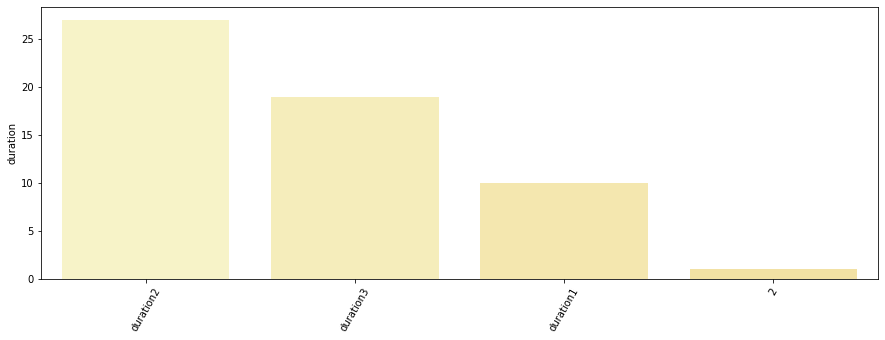

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15,5))
colors = sns.color_palette("YlOrRd", 25)
names = data.duration.value_counts().head(25).index
values = data.duration.value_counts().head(25)
sns.barplot(x = names, y = values, palette = colors)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

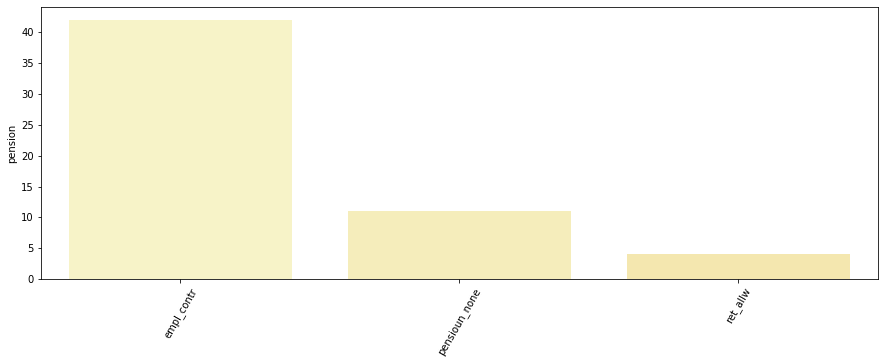

In [164]:
fig = plt.figure(figsize=(15,5))
colors = sns.color_palette("YlOrRd", 25)
names = data.pension.value_counts().head(25).index
values = data.pension.value_counts().head(25)
sns.barplot(x = names, y = values, palette = colors)
plt.xticks(rotation=60)

In [165]:
records = []
for i in range(0, 57):
    records.append([str(data.values[i,j]) for j in range(0, 16)])
rules = apriori(records, min_support = 0.00030, min_confidence = 0.05, min_lift = 3, max_length = 2, target = "rules")
association_results = list(rules)
print(association_results[0])

RelationRecord(items=frozenset({'2', 'Sd_5'}), support=0.017543859649122806, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2'}), items_add=frozenset({'Sd_5'}), confidence=1.0, lift=9.5), OrderedStatistic(items_base=frozenset({'Sd_5'}), items_add=frozenset({'2'}), confidence=0.16666666666666666, lift=9.5)])


In [166]:
for item in association_results:
    
    pair = item[0]
    items = [x for x in pair]
    
    print("Rule : ", items[0], " -> " + items[1])
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))
    
    print("=============================")

Rule :  2  -> Sd_5
Support :  0.017543859649122806
Confidence :  1.0
Lift :  9.5
Rule :  2  -> generous
Support :  0.017543859649122806
Confidence :  1.0
Lift :  3.5625
Rule :  2  -> wageFirst2
Support :  0.017543859649122806
Confidence :  1.0
Lift :  5.1818181818181825
Rule :  2  -> workinghours38
Support :  0.017543859649122806
Confidence :  1.0
Lift :  4.75
Rule :  colatc  -> Sd_0
Support :  0.017543859649122806
Confidence :  1.0
Lift :  8.142857142857144
Rule :  Sd_0  -> dentalplan_none
Support :  0.017543859649122806
Confidence :  1.0
Lift :  6.333333333333334
Rule :  duration1  -> Sd_0
Support :  0.017543859649122806
Confidence :  1.0
Lift :  5.7
Rule :  generous  -> Sd_0
Support :  0.017543859649122806
Confidence :  1.0
Lift :  3.5625
Rule :  Sd_0  -> healtsplan_none
Support :  0.017543859649122806
Confidence :  1.0
Lift :  7.125
Rule :  ret_allw  -> Sd_0
Support :  0.017543859649122806
Confidence :  1.0
Lift :  14.25
Rule :  standByPay4  -> Sd_0
Support :  0.017543859649122806
